# Feedback Prize - Evaluating Student Writing
## Analyze argumentative writing elements from students grade 6-12

task is to predict the human annotations. You will first need to segment each essay into discrete rhetorical and argumentative elements (i.e., discourse elements) and then classify each element as one of the following:

Meaning of rhetoric—language designed to motivate, persuade, or inform. Advertisers create catchy slogans to get people to buy products. Lawyers present emotional arguments to sway a jury. These are all examples of rhetoric
Here 

#### Lead - an introduction that begins with a statistic, a quotation, a description, or some other device to grab the reader’s attention and point toward the thesis
#### Position - an opinion or conclusion on the main question
#### Claim - a claim that supports the position
#### Counterclaim - a claim that refutes another claim or gives an opposing reason to the position
#### Rebuttal - a claim that refutes a counterclaim
#### Evidence - ideas or examples that support claims, counterclaims, or rebuttals.
#### Concluding Statement - a concluding statement that restates the claims

## The train dataset gives us the following human annotations that are extracted from this essay.

#### id - ID code for essay response
#### discourse_id - ID code for discourse element
#### discourse_start - character position where discourse element begins in the essay response
#### discourse_end - character position where discourse element ends in the essay response
#### discourse_text - text of discourse element
####  discourse_type - classification of discourse element
#### discourse_type_num - enumerated class label of discourse element
####  predictionstring - the word indices of the training sample, as required for predictions

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
from plotly.offline import init_notebook_mode, iplot
py.offline.init_notebook_mode(connected=True)


In [4]:
## Reading the CSV Data 
df = pd.read_csv('train.csv', index_col=0)

In [5]:
df

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   
...                    ...              ...            ...   
4C471936CD75  1.618150e+12             2234           3203   
4C471936CD75  1.618150e+12             3221           4509   
4C471936CD75  1.618020e+12             4510           4570   
4C471936CD75  1.618030e+12             4570           4922   
4C471936CD75  1.618030e+12             4935           5825   

                                                 discourse_text  \
id                                                                
423A1CA112E2  Modern humans today are always on their phone....   
423A1CA112E2  They are some really bad consequences when stu...   
423A1CA112E2  Some certain areas in the United States ban ph...   
423A1CA112E2  When people have phones, they know about certa...   
423A1CA112E2  Driving is one of the way how to get around. P...   
...                                                         ...   
4C471936CD75   if I'm not sure what college I want to attend...   
4C471936CD75   seeking multiple opinions before making a har...   
4C471936CD75  it is better to seek multiple opinions instead...   
4C471936CD75  The impact of asking people to help you make a...   
4C471936CD75  there are many other reasons one might want to...   

                    discourse_type      discourse_type_num  \
id                                                           
423A1CA112E2                  Lead                  Lead 1   
423A1CA112E2              Position              Position 1   
423A1CA112E2              Evidence              Evidence 1   
423A1CA112E2              Evidence              Evidence 2   
423A1CA112E2                 Claim                 Claim 1   
...                            ...                     ...   
4C471936CD75              Evidence              Evidence 2   
4C471936CD75              Evidence              Evidence 3   
4C471936CD75              Position              Position 1   
4C471936CD75              Evidence              Evidence 4   
4C471936CD75  Concluding Statement  Concluding Statement 1   

                                               predictionstring  
id                                                               
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...  
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75  
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...  
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...  
...                                                         ...  
4C471936CD75  386 387 388 389 390 391 392 393 394 395 396 39...  
4C471936CD75  576 577 578 579 580 581 582 583 584 585 586 58...  
4C471936CD75        828 829 830 831 832 833 834 835 836 837 838  
4C471936CD75  839 840 841 842 843 844 845 846 847 848 849 85...  
4C471936CD75  905 906 907 908 909 910 911 912 913 914 915 91...  

[144293 rows x 7 columns]

In [6]:
## Checking the NULL Values
df.isnull().sum()

discourse_id          0
discourse_start       0
discourse_end         0
discourse_text        0
discourse_type        0
discourse_type_num    0
predictionstring      0
dtype: int64

In [7]:
df.columns

Index(['discourse_id', 'discourse_start', 'discourse_end', 'discourse_text',
       'discourse_type', 'discourse_type_num', 'predictionstring'],
      dtype='object')

In [168]:
## Length of the predictionstring & discourse_text
## Applying Python Lambda Function to to create length of the string 

df['predictionstring_len'] = df['predictionstring'].apply(lambda x:len(x.split())) 
df['discourse_text_len'] = df['discourse_text'].apply(lambda x:len(x.split()))

In [169]:
df.head(5)

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   

                                                 discourse_text  \
id                                                                
423A1CA112E2  modern humans today are always on their phone....   
423A1CA112E2  they are some really bad consequences when stu...   
423A1CA112E2  some certain areas in the united states ban ph...   
423A1CA112E2  when people have phones, they know about certa...   
423A1CA112E2  driving is one of the way how to get around. p...   

             discourse_type discourse_type_num  \
id                                               
423A1CA112E2           Lead             Lead 1   
423A1CA112E2       Position         Position 1   
423A1CA112E2       Evidence         Evidence 1   
423A1CA112E2       Evidence         Evidence 2   
423A1CA112E2          Claim            Claim 1   

                                               predictionstring  \
id                                                                
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...   

              predictionstring_len  discourse_text_len  match  \
id                                                              
423A1CA112E2                    44                  44   True   
423A1CA112E2                    15                  15   True   
423A1CA112E2                    16                  16   True   
423A1CA112E2                    63                  63   True   
423A1CA112E2                    24                  24   True   

                                           Clean_discourse_text  word_count  \
id                                                                            
423A1CA112E2  modern humans today are always on their phone ...          44   
423A1CA112E2  they are some really bad consequences when stu...          15   
423A1CA112E2  some certain areas in the united states ban ph...          16   
423A1CA112E2  when people have phones  they know about certa...          63   
423A1CA112E2  driving is one of the way how to get around  p...          24   

              avg_word_length  sentiment_polarity  sentiment_subjectivity  \
id                                                                          
423A1CA112E2         3.954545            0.183333                0.216667   
423A1CA112E2         4.466667           -0.700000                0.666667   
423A1CA112E2         4.437500            0.214286                0.571429   
423A1CA112E2         4.555556            0.029762                0.515476   
423A1CA112E2         4.208333           -0.333333                0.666667   

                                                lemmatizer_text  
id                                                               
423A1CA112E2  modern human today are always on their phone t...  
423A1CA112E2  they are some really bad consequence when stuf...  
423A1CA112E2  some certain area in the united state ban phon...  
423A1CA112E2  when people have phone they know about certain...  
423A1CA112E2  driving is one of the way how to get around pe...

In [9]:
#Checking Wheather Prediction String & Discourse Text Are same or not
comparison_column = np.where(df["predictionstring_len"] == df["discourse_text_len"], True, False)
df["match"] = comparison_column ## Storing as True/False

In [43]:
df.head()

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   

                                                 discourse_text  \
id                                                                
423A1CA112E2  Modern humans today are always on their phone....   
423A1CA112E2  They are some really bad consequences when stu...   
423A1CA112E2  Some certain areas in the United States ban ph...   
423A1CA112E2  When people have phones, they know about certa...   
423A1CA112E2  Driving is one of the way how to get around. P...   

             discourse_type discourse_type_num  \
id                                               
423A1CA112E2           Lead             Lead 1   
423A1CA112E2       Position         Position 1   
423A1CA112E2       Evidence         Evidence 1   
423A1CA112E2       Evidence         Evidence 2   
423A1CA112E2          Claim            Claim 1   

                                               predictionstring  \
id                                                                
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...   

              predictionstring_len  discourse_text_len  match  
id                                                             
423A1CA112E2                    44                  44   True  
423A1CA112E2                    15                  15   True  
423A1CA112E2                    16                  16   True  
423A1CA112E2                    63                  63   True  
423A1CA112E2                    24                  24   True

In [10]:
## Distribution of Match/Unmatch Value
df["match"].value_counts()

True     143822
False       471
Name: match, dtype: int64

In [171]:
df['discourse_type'].value_counts()

Claim                   50208
Evidence                45702
Position                15419
Concluding Statement    13505
Lead                     9305
Counterclaim             5817
Rebuttal                 4337
Name: discourse_type, dtype: int64

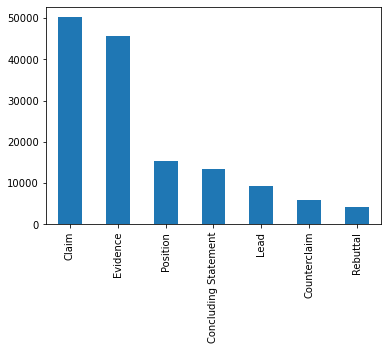

In [172]:
 df['discourse_type'].value_counts().plot(kind='bar')

In [22]:
df.groupby(['discourse_type'])['match'].value_counts()

discourse_type        match
Claim                 True     50034
                      False      174
Concluding Statement  True     13404
                      False      101
Counterclaim          True      5805
                      False       12
Evidence              True     45591
                      False      111
Lead                  True      9282
                      False       23
Position              True     15380
                      False       39
Rebuttal              True      4326
                      False       11
Name: match, dtype: int64

In [161]:
df.groupby(['discourse_type'])['discourse_type_num'].value_counts()

discourse_type        discourse_type_num    
Claim                 Claim 1                   14927
                      Claim 2                   13212
                      Claim 3                    9862
                      Claim 4                    5619
                      Claim 5                    3498
                      Claim 6                    2589
                      Claim 7                     324
                      Claim 8                     122
                      Claim 9                      34
                      Claim 10                     15
                      Claim 11                      5
                      Claim 12                      1
Concluding Statement  Concluding Statement 1    13418
                      Concluding Statement 2       85
                      Concluding Statement 3        1
                      Concluding Statement 4        1
Counterclaim          Counterclaim 1             4576
                      Counterclaim 2 

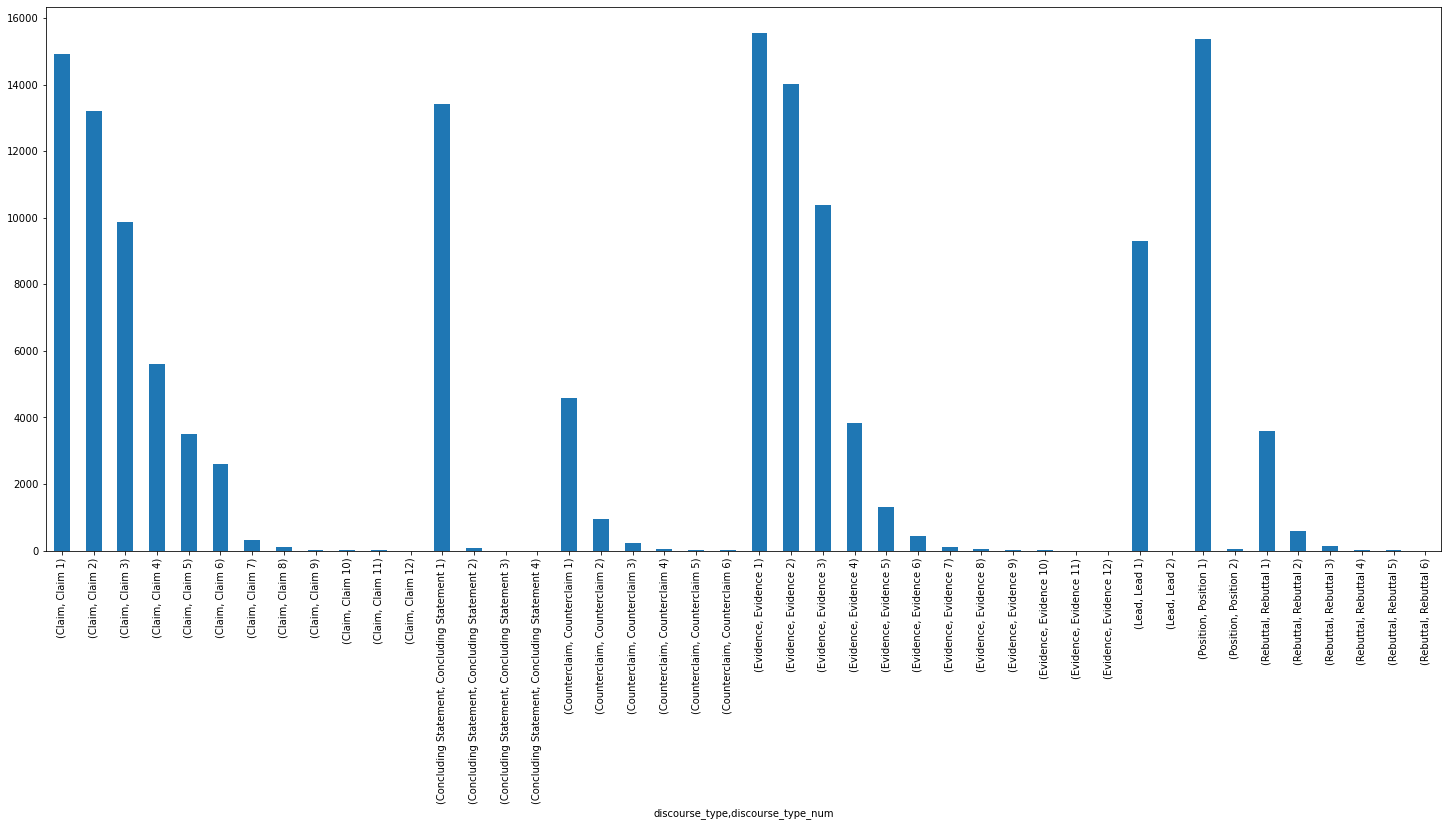

In [167]:
df.groupby(['discourse_type'])['discourse_type_num'].value_counts().plot(kind ='bar', figsize=(25, 10)  )

In [23]:
df['discourse_text'] = df['discourse_text'].str.lower()

In [24]:
df

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   
...                    ...              ...            ...   
4C471936CD75  1.618150e+12             2234           3203   
4C471936CD75  1.618150e+12             3221           4509   
4C471936CD75  1.618020e+12             4510           4570   
4C471936CD75  1.618030e+12             4570           4922   
4C471936CD75  1.618030e+12             4935           5825   

                                                 discourse_text  \
id                                                                
423A1CA112E2  modern humans today are always on their phone....   
423A1CA112E2  they are some really bad consequences when stu...   
423A1CA112E2  some certain areas in the united states ban ph...   
423A1CA112E2  when people have phones, they know about certa...   
423A1CA112E2  driving is one of the way how to get around. p...   
...                                                         ...   
4C471936CD75   if i'm not sure what college i want to attend...   
4C471936CD75   seeking multiple opinions before making a har...   
4C471936CD75  it is better to seek multiple opinions instead...   
4C471936CD75  the impact of asking people to help you make a...   
4C471936CD75  there are many other reasons one might want to...   

                    discourse_type      discourse_type_num  \
id                                                           
423A1CA112E2                  Lead                  Lead 1   
423A1CA112E2              Position              Position 1   
423A1CA112E2              Evidence              Evidence 1   
423A1CA112E2              Evidence              Evidence 2   
423A1CA112E2                 Claim                 Claim 1   
...                            ...                     ...   
4C471936CD75              Evidence              Evidence 2   
4C471936CD75              Evidence              Evidence 3   
4C471936CD75              Position              Position 1   
4C471936CD75              Evidence              Evidence 4   
4C471936CD75  Concluding Statement  Concluding Statement 1   

                                               predictionstring  \
id                                                                
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...   
...                                                         ...   
4C471936CD75  386 387 388 389 390 391 392 393 394 395 396 39...   
4C471936CD75  576 577 578 579 580 581 582 583 584 585 586 58...   
4C471936CD75        828 829 830 831 832 833 834 835 836 837 838   
4C471936CD75  839 840 841 842 843 844 845 846 847 848 849 85...   
4C471936CD75  905 906 907 908 909 910 911 912 913 914 915 91...   

              predictionstring_len  discourse_text_len  match  
id                                                             
423A1CA112E2                    44                  44   True  
423A1CA112E2                    15                  15   True  
423A1CA112E2                    16                  16   True  
423A1CA112E2                    63                  63   True  
423A1CA112E2                    24                  24   True  
...                            ...                 ...    ...  
4C471936CD75                   187                 187   True  
4C471936CD75                   252                 252   True  
4C471936CD75    

In [25]:
word_list= list(df['discourse_text'])
CleanContent_List = [] ## Stores List of clean description

In [26]:
word_list= list(df['discourse_text']) 
CleanContent_List = [] ## Stores List of clean description

import re

for content in word_list:
    cleanContent = re.sub(r'[^a-zA-Z0-9]', ' ', str(content)) ### Taking the Alphanumeric Chracters only using re.sub technique
    #cleanContent = re.sub('+', ' ', cleanContent)
    CleanContent_List.append(cleanContent)
    
df['Clean_discourse_text'] = CleanContent_List ## Stores in the dataframe in Clean_discourse_text Column   

In [27]:
df['Clean_discourse_text'] = CleanContent_List

In [28]:
df.head()

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   

                                                 discourse_text  \
id                                                                
423A1CA112E2  modern humans today are always on their phone....   
423A1CA112E2  they are some really bad consequences when stu...   
423A1CA112E2  some certain areas in the united states ban ph...   
423A1CA112E2  when people have phones, they know about certa...   
423A1CA112E2  driving is one of the way how to get around. p...   

             discourse_type discourse_type_num  \
id                                               
423A1CA112E2           Lead             Lead 1   
423A1CA112E2       Position         Position 1   
423A1CA112E2       Evidence         Evidence 1   
423A1CA112E2       Evidence         Evidence 2   
423A1CA112E2          Claim            Claim 1   

                                               predictionstring  \
id                                                                
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...   

              predictionstring_len  discourse_text_len  match  \
id                                                              
423A1CA112E2                    44                  44   True   
423A1CA112E2                    15                  15   True   
423A1CA112E2                    16                  16   True   
423A1CA112E2                    63                  63   True   
423A1CA112E2                    24                  24   True   

                                           Clean_discourse_text  
id                                                               
423A1CA112E2  modern humans today are always on their phone ...  
423A1CA112E2  they are some really bad consequences when stu...  
423A1CA112E2  some certain areas in the united states ban ph...  
423A1CA112E2  when people have phones  they know about certa...  
423A1CA112E2  driving is one of the way how to get around  p...

In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


##### We can See that for 471 samples , prediction string & discourse string count value is not matching

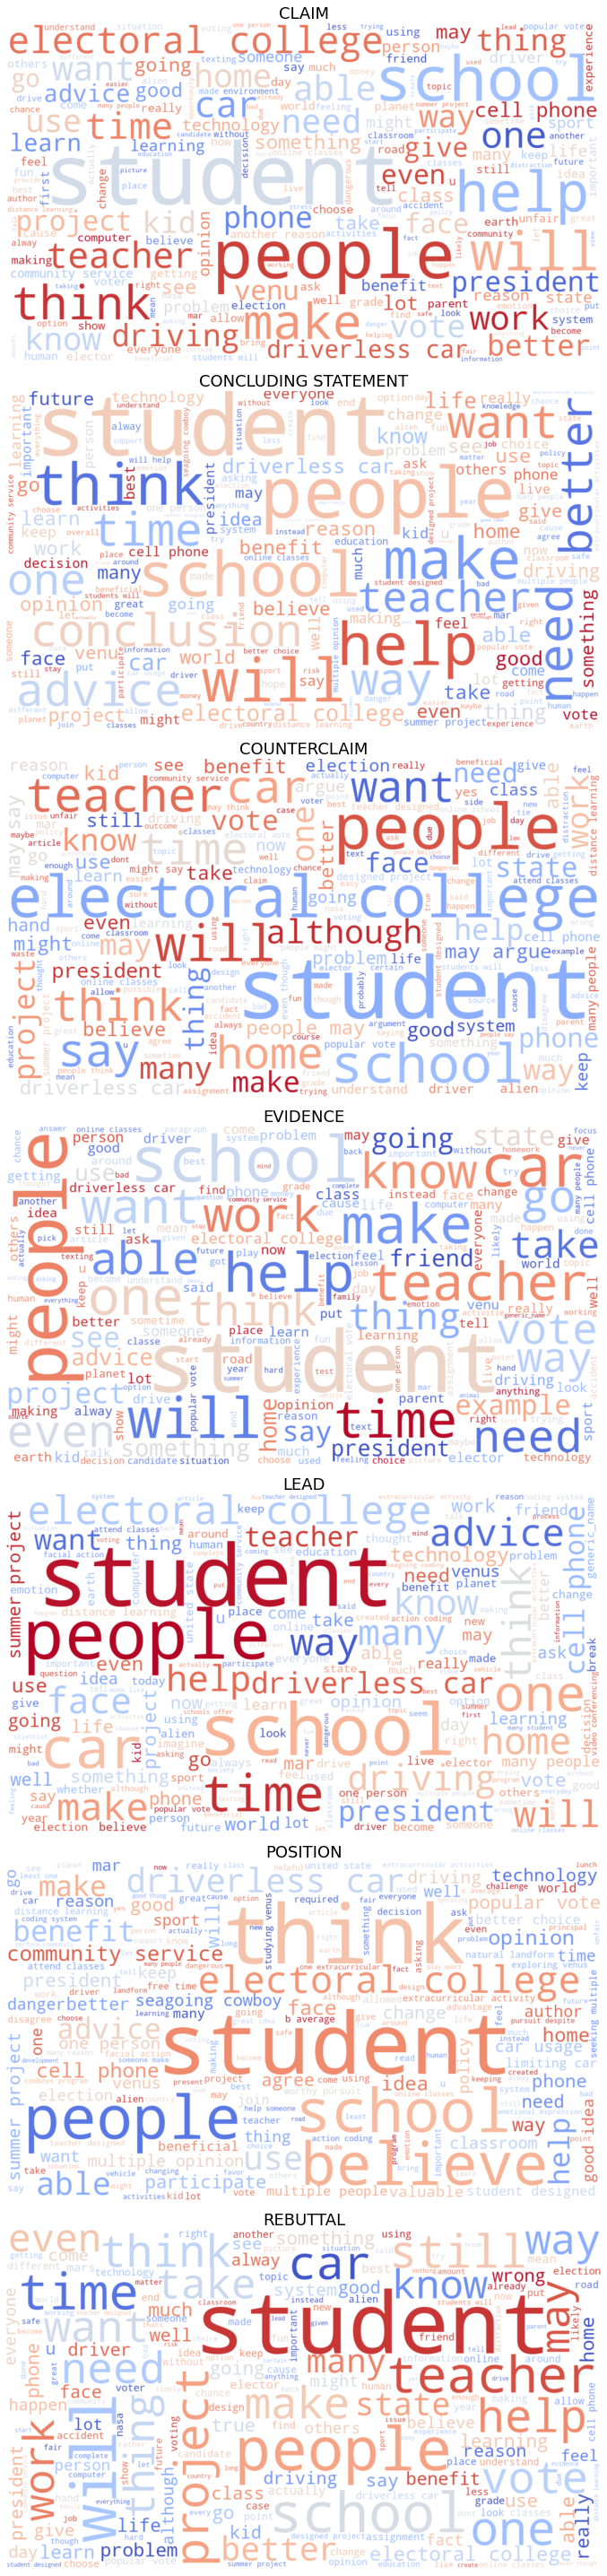

In [29]:
## WORDCLOUD GENERATION based on Discourse_TYPE
from wordcloud import WordCloud , STOPWORDS
# Create the figure and axes we will use (7 subplots for 7 classes)
fig, axs = plt.subplots(7, 1, figsize=(20, 40))
plt_idx = 0

for discourse_type, d in df.groupby("discourse_type"):
    # Concatenate all the discourse texts into a single string
    discourse_text = " ".join(d["discourse_text"].values.tolist())
    stopwords = set(STOPWORDS)
    
    # Generate the word cloud
    wordcloud = WordCloud(
        max_font_size=200,
        max_words=200,
        width=1400,
        height=800,
        colormap="coolwarm",
        background_color="white",
        stopwords = stopwords
    ).generate(discourse_text)
    
    # Manage the axes
    axs = axs.flatten()
    axs[plt_idx].imshow(wordcloud, interpolation="bilinear")
    axs[plt_idx].set_title(discourse_type.upper(), fontsize=18)
    axs[plt_idx].axis("off")
    plt_idx += 1

# Plot
plt.tight_layout()
plt.show()

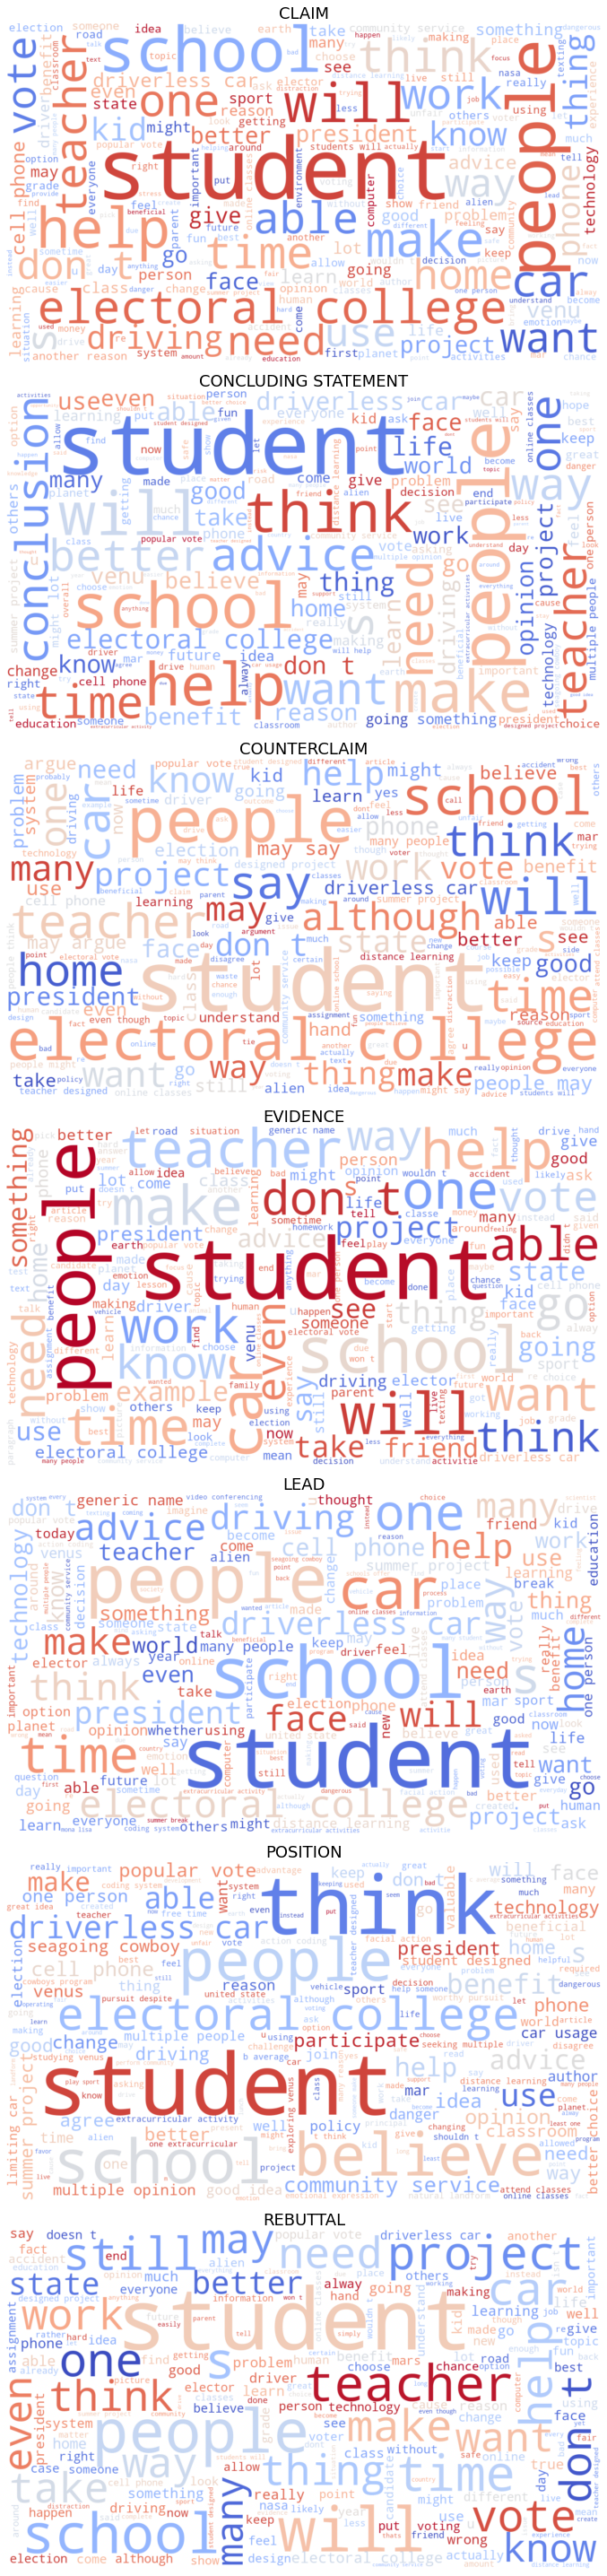

In [102]:
## WORDCLOUD GENERATION based on Discourse_TYPE
from wordcloud import WordCloud , STOPWORDS
# Create the figure and axes we will use (7 subplots for 7 classes)
fig, axs = plt.subplots(7, 1, figsize=(20, 40))
plt_idx = 0

for discourse_type, d in df.groupby("discourse_type"):
    # Concatenate all the discourse texts into a single string
    discourse_text = " ".join(d["Clean_discourse_text"].values.tolist())
    stopwords = set(STOPWORDS)
    
    # Generate the word cloud
    wordcloud = WordCloud(
        max_font_size=200,
        max_words=200,
        width=1400,
        height=800,
        colormap="coolwarm",
        background_color="white",
        stopwords = stopwords
    ).generate(discourse_text)
    
    # Manage the axes
    axs = axs.flatten()
    axs[plt_idx].imshow(wordcloud, interpolation="bilinear")
    axs[plt_idx].set_title(discourse_type.upper(), fontsize=18)
    axs[plt_idx].axis("off")
    plt_idx += 1

# Plot
plt.tight_layout()
plt.show()

In [30]:
## Storing original Dataframe
df_new = df

In [31]:
df_new.head()

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   

                                                 discourse_text  \
id                                                                
423A1CA112E2  modern humans today are always on their phone....   
423A1CA112E2  they are some really bad consequences when stu...   
423A1CA112E2  some certain areas in the united states ban ph...   
423A1CA112E2  when people have phones, they know about certa...   
423A1CA112E2  driving is one of the way how to get around. p...   

             discourse_type discourse_type_num  \
id                                               
423A1CA112E2           Lead             Lead 1   
423A1CA112E2       Position         Position 1   
423A1CA112E2       Evidence         Evidence 1   
423A1CA112E2       Evidence         Evidence 2   
423A1CA112E2          Claim            Claim 1   

                                               predictionstring  \
id                                                                
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...   

              predictionstring_len  discourse_text_len  match  \
id                                                              
423A1CA112E2                    44                  44   True   
423A1CA112E2                    15                  15   True   
423A1CA112E2                    16                  16   True   
423A1CA112E2                    63                  63   True   
423A1CA112E2                    24                  24   True   

                                           Clean_discourse_text  
id                                                               
423A1CA112E2  modern humans today are always on their phone ...  
423A1CA112E2  they are some really bad consequences when stu...  
423A1CA112E2  some certain areas in the united states ban ph...  
423A1CA112E2  when people have phones  they know about certa...  
423A1CA112E2  driving is one of the way how to get around  p...

In [34]:
df_new['word_count'] = df_new['Clean_discourse_text'].apply(lambda x : len(x.split()))

In [35]:
df_new.head()

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   

                                                 discourse_text  \
id                                                                
423A1CA112E2  modern humans today are always on their phone....   
423A1CA112E2  they are some really bad consequences when stu...   
423A1CA112E2  some certain areas in the united states ban ph...   
423A1CA112E2  when people have phones, they know about certa...   
423A1CA112E2  driving is one of the way how to get around. p...   

             discourse_type discourse_type_num  \
id                                               
423A1CA112E2           Lead             Lead 1   
423A1CA112E2       Position         Position 1   
423A1CA112E2       Evidence         Evidence 1   
423A1CA112E2       Evidence         Evidence 2   
423A1CA112E2          Claim            Claim 1   

                                               predictionstring  \
id                                                                
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...   

              predictionstring_len  discourse_text_len  match  \
id                                                              
423A1CA112E2                    44                  44   True   
423A1CA112E2                    15                  15   True   
423A1CA112E2                    16                  16   True   
423A1CA112E2                    63                  63   True   
423A1CA112E2                    24                  24   True   

                                           Clean_discourse_text  word_count  
id                                                                           
423A1CA112E2  modern humans today are always on their phone ...          44  
423A1CA112E2  they are some really bad consequences when stu...          15  
423A1CA112E2  some certain areas in the united states ban ph...          16  
423A1CA112E2  when people have phones  they know about certa...          63  
423A1CA112E2  driving is one of the way how to get around  p...          24

In [175]:
df_new['word_count'].value_counts()

13     3781
12     3675
11     3603
10     3579
14     3574
       ... 
470       1
397       1
423       1
471       1
321       1
Name: word_count, Length: 432, dtype: int64

In [36]:
#Find the Avarage Word Length 

def avg_word_length(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)

df_new['avg_word_length'] = df_new['Clean_discourse_text'].apply(lambda x : avg_word_length(x))

In [37]:
df_new['avg_word_length'] = df_new['Clean_discourse_text'].apply(lambda x : avg_word_length(x))

In [38]:
df_new.head()

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   

                                                 discourse_text  \
id                                                                
423A1CA112E2  modern humans today are always on their phone....   
423A1CA112E2  they are some really bad consequences when stu...   
423A1CA112E2  some certain areas in the united states ban ph...   
423A1CA112E2  when people have phones, they know about certa...   
423A1CA112E2  driving is one of the way how to get around. p...   

             discourse_type discourse_type_num  \
id                                               
423A1CA112E2           Lead             Lead 1   
423A1CA112E2       Position         Position 1   
423A1CA112E2       Evidence         Evidence 1   
423A1CA112E2       Evidence         Evidence 2   
423A1CA112E2          Claim            Claim 1   

                                               predictionstring  \
id                                                                
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...   

              predictionstring_len  discourse_text_len  match  \
id                                                              
423A1CA112E2                    44                  44   True   
423A1CA112E2                    15                  15   True   
423A1CA112E2                    16                  16   True   
423A1CA112E2                    63                  63   True   
423A1CA112E2                    24                  24   True   

                                           Clean_discourse_text  word_count  \
id                                                                            
423A1CA112E2  modern humans today are always on their phone ...          44   
423A1CA112E2  they are some really bad consequences when stu...          15   
423A1CA112E2  some certain areas in the united states ban ph...          16   
423A1CA112E2  when people have phones  they know about certa...          63   
423A1CA112E2  driving is one of the way how to get around  p...          24   

              avg_word_length  
id                             
423A1CA112E2         3.954545  
423A1CA112E2         4.466667  
423A1CA112E2         4.437500  
423A1CA112E2         4.555556  
423A1CA112E2         4.208333

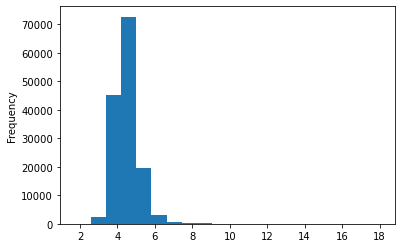

In [45]:
df_new['avg_word_length'].plot(kind ='hist' , bins =20)

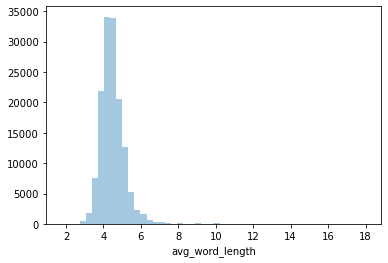

In [81]:
sns.distplot(df_new['avg_word_length'],kde = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C002DCAA30>,
      dtype=object)

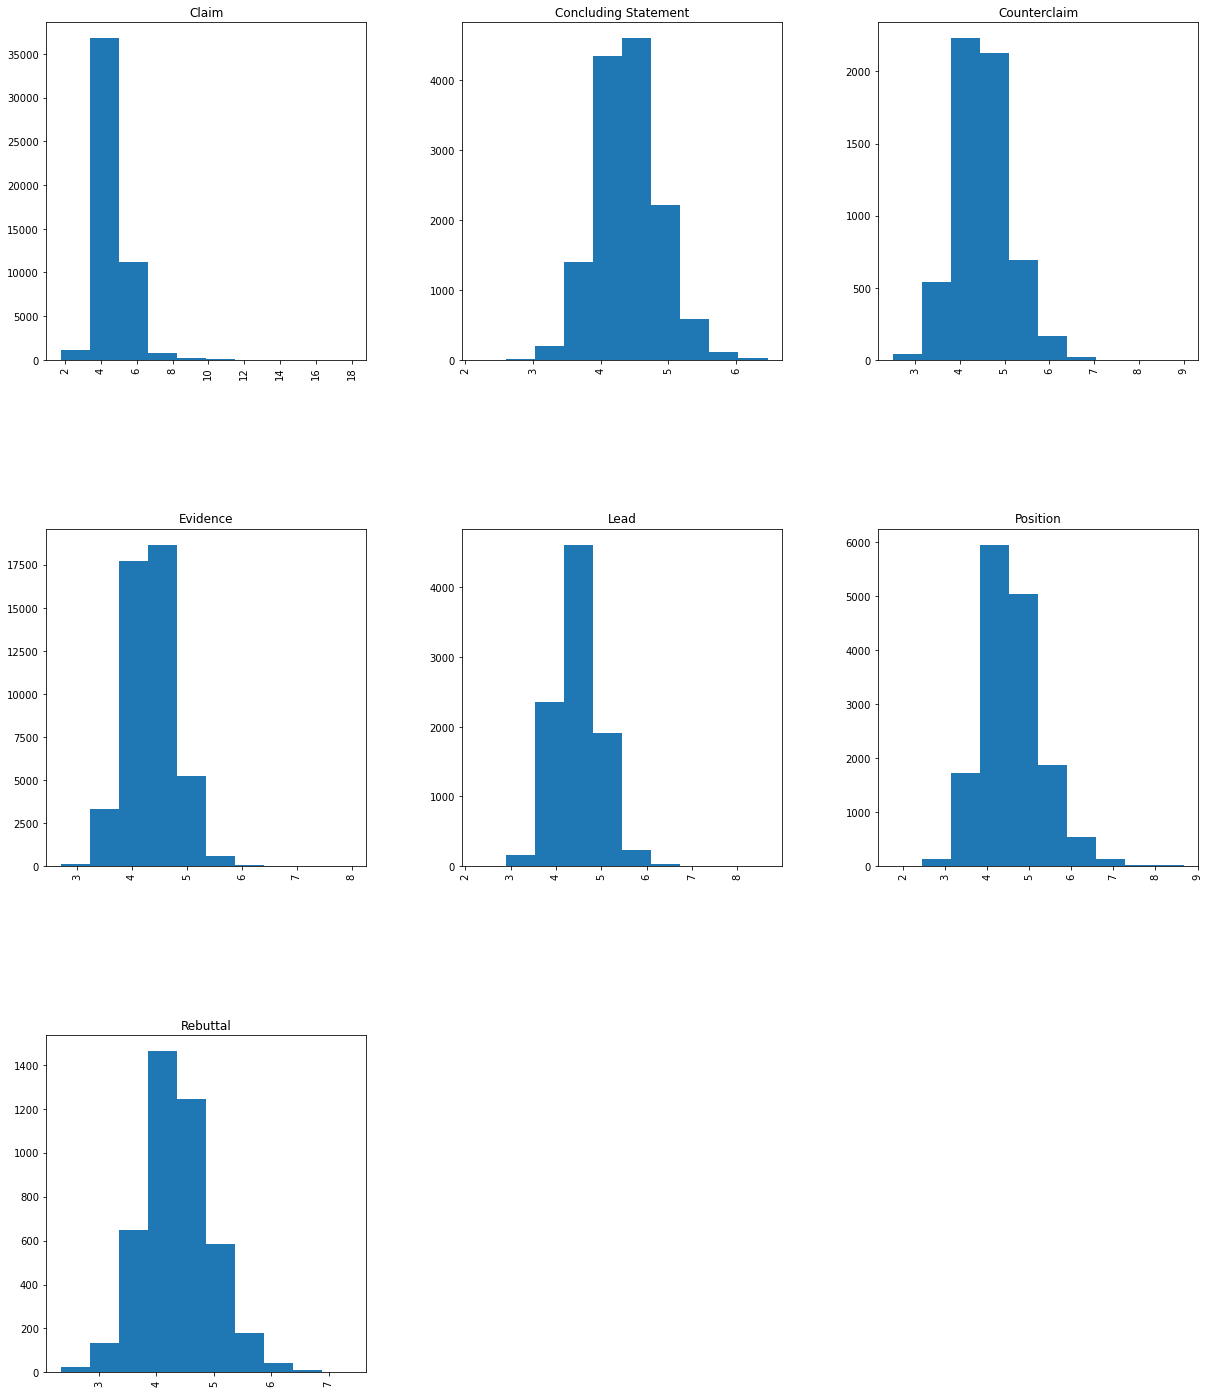

In [71]:
df_new['avg_word_length'].hist(by=df_new['discourse_type'], figsize=(20, 25),bins = 10, )


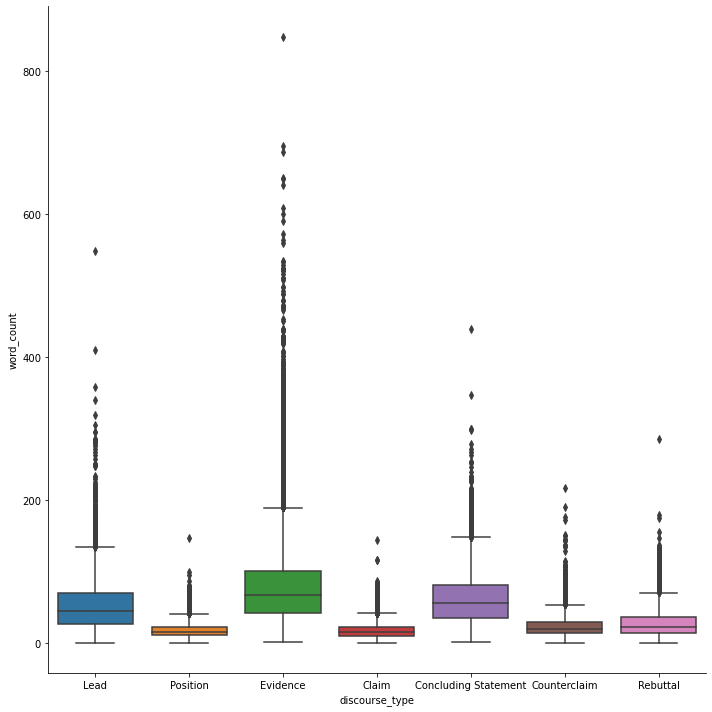

In [78]:
sns.catplot(x='discourse_type' , y = 'word_count' , data =df_new , kind = 'box' , height=10 )

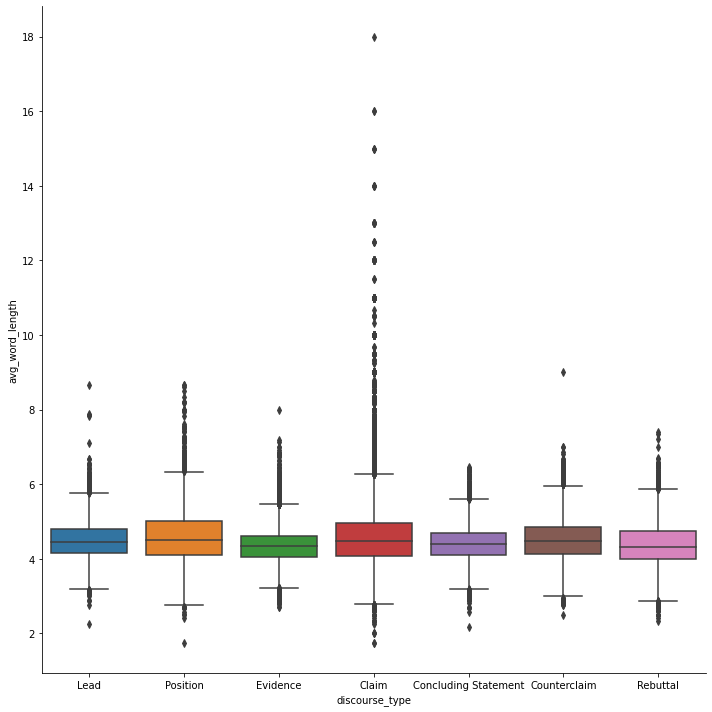

In [79]:
sns.catplot(x='discourse_type' , y = 'avg_word_length' , data =df_new , kind = 'box' , height=10 )    

In [83]:
from textblob import TextBlob
df_new['sentiment_polarity'] = df_new['Clean_discourse_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [85]:
df_new['sentiment_subjectivity'] = df_new['Clean_discourse_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [86]:
df_new.head(5)

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   

                                                 discourse_text  \
id                                                                
423A1CA112E2  modern humans today are always on their phone....   
423A1CA112E2  they are some really bad consequences when stu...   
423A1CA112E2  some certain areas in the united states ban ph...   
423A1CA112E2  when people have phones, they know about certa...   
423A1CA112E2  driving is one of the way how to get around. p...   

             discourse_type discourse_type_num  \
id                                               
423A1CA112E2           Lead             Lead 1   
423A1CA112E2       Position         Position 1   
423A1CA112E2       Evidence         Evidence 1   
423A1CA112E2       Evidence         Evidence 2   
423A1CA112E2          Claim            Claim 1   

                                               predictionstring  \
id                                                                
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...   

              predictionstring_len  discourse_text_len  match  \
id                                                              
423A1CA112E2                    44                  44   True   
423A1CA112E2                    15                  15   True   
423A1CA112E2                    16                  16   True   
423A1CA112E2                    63                  63   True   
423A1CA112E2                    24                  24   True   

                                           Clean_discourse_text  word_count  \
id                                                                            
423A1CA112E2  modern humans today are always on their phone ...          44   
423A1CA112E2  they are some really bad consequences when stu...          15   
423A1CA112E2  some certain areas in the united states ban ph...          16   
423A1CA112E2  when people have phones  they know about certa...          63   
423A1CA112E2  driving is one of the way how to get around  p...          24   

              avg_word_length  sentiment_polarity  sentiment_subjectivity  
id                                                                         
423A1CA112E2         3.954545            0.183333                0.216667  
423A1CA112E2         4.466667           -0.700000                0.666667  
423A1CA112E2         4.437500            0.214286                0.571429  
423A1CA112E2         4.555556            0.029762                0.515476  
423A1CA112E2         4.208333           -0.333333                0.666667

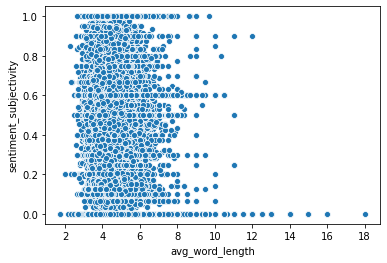

In [183]:
sns.scatterplot(x='avg_word_length' , y = 'sentiment_subjectivity' , data =df_new )

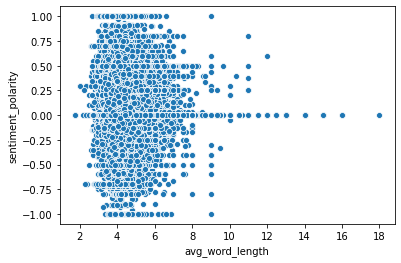

In [184]:
sns.scatterplot(x='avg_word_length' , y = 'sentiment_polarity' , data =df_new )

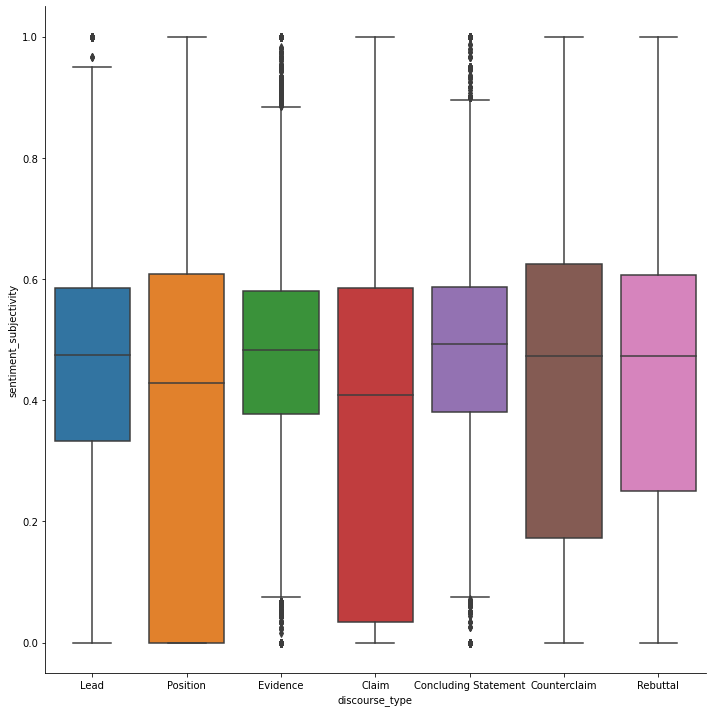

In [176]:
sns.catplot(x='discourse_type' , y = 'sentiment_subjectivity' , data =df_new , kind = 'box' , height=10 )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C03C085520>,
      dtype=object)

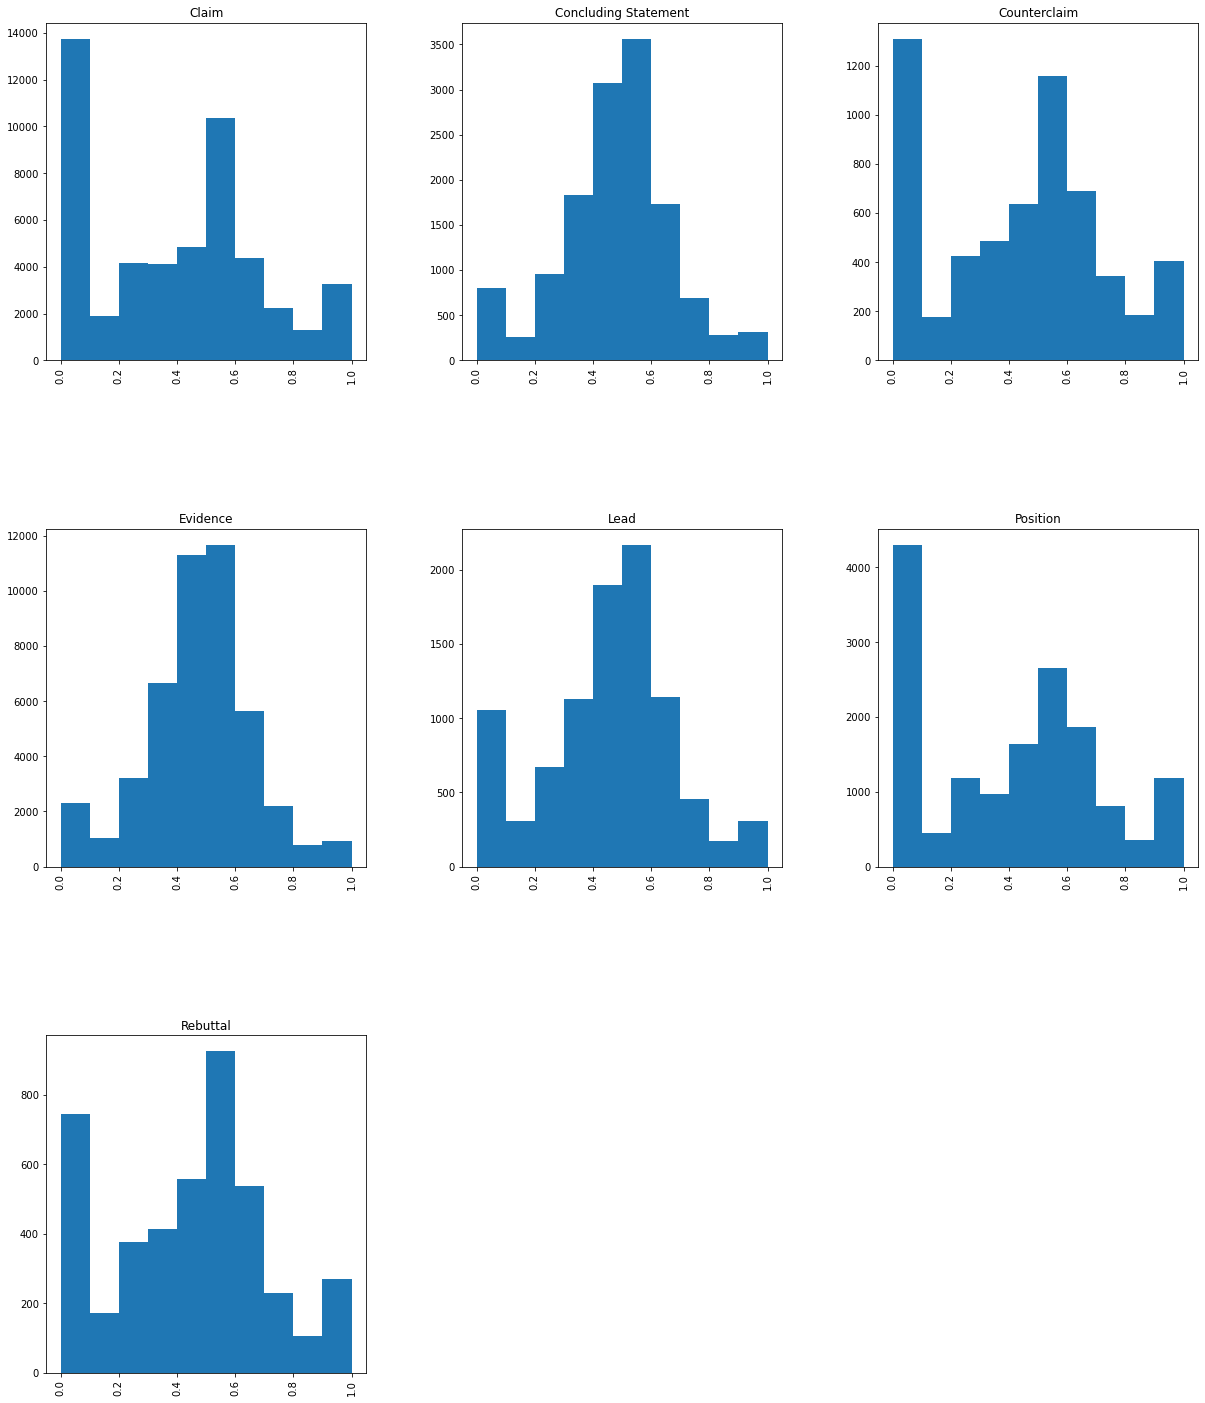

In [186]:
df_new['sentiment_subjectivity'].hist(by=df_new['discourse_type'], figsize=(20, 25),bins = 10, )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C01DF90310>,
      dtype=object)

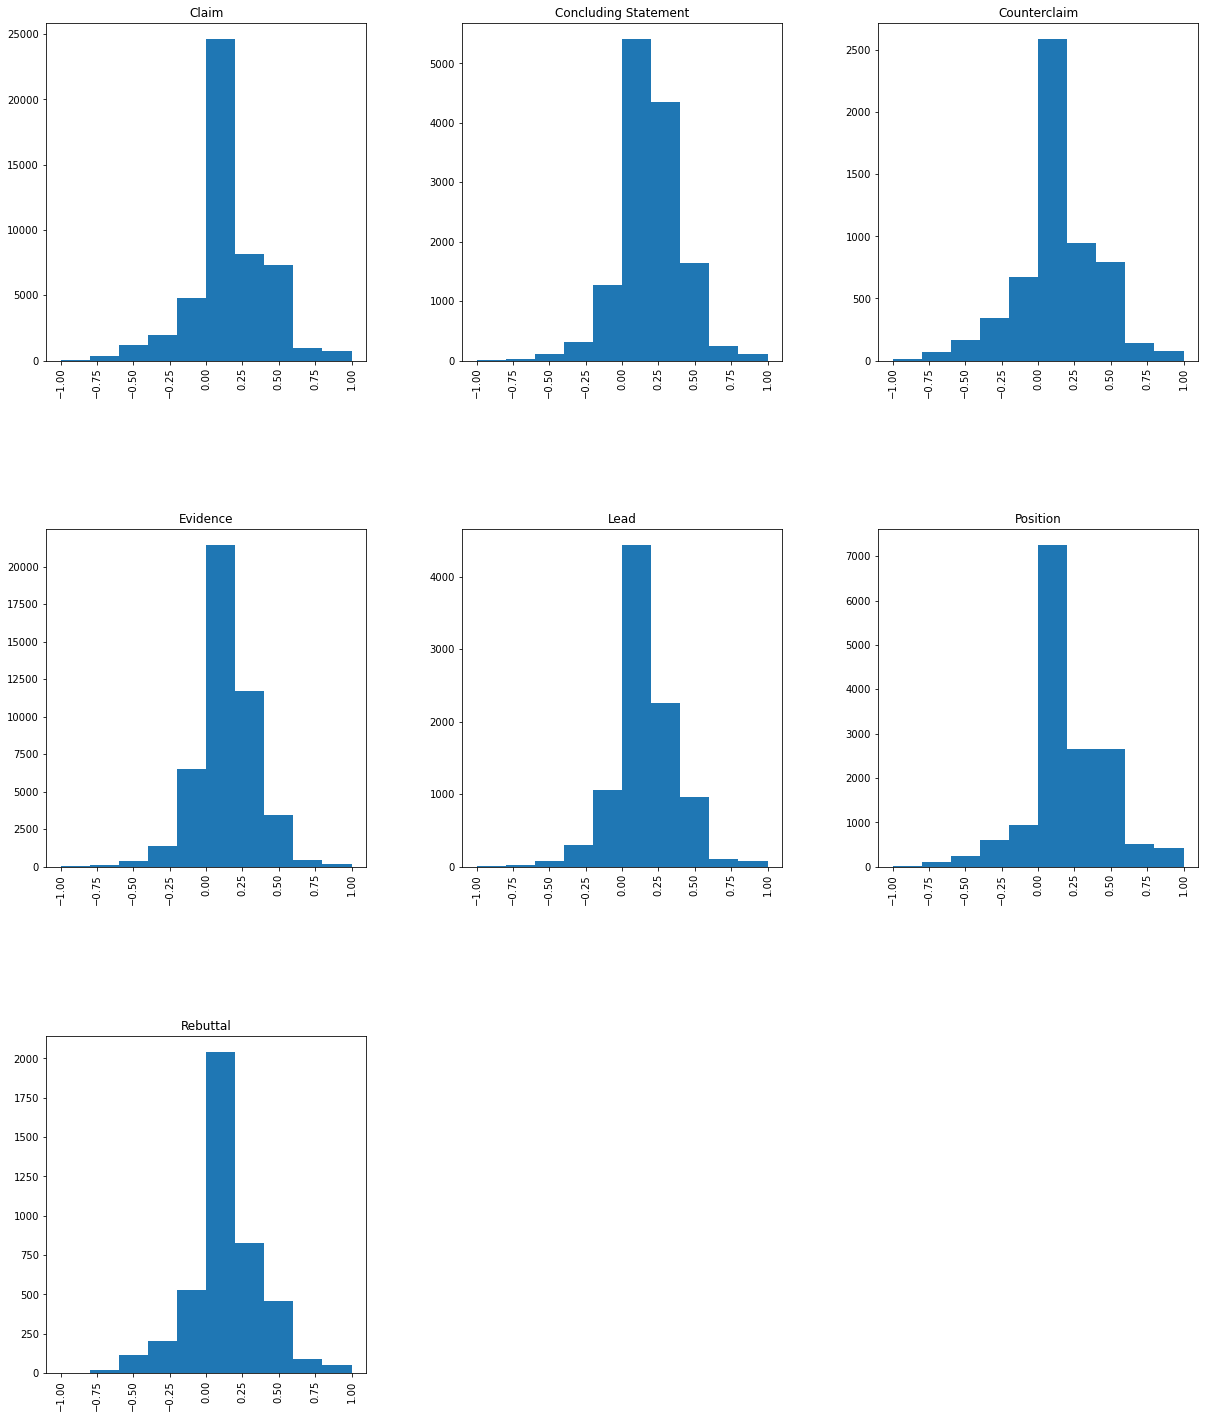

In [187]:
df_new['sentiment_polarity'].hist(by=df_new['discourse_type'], figsize=(20, 25),bins = 10, )

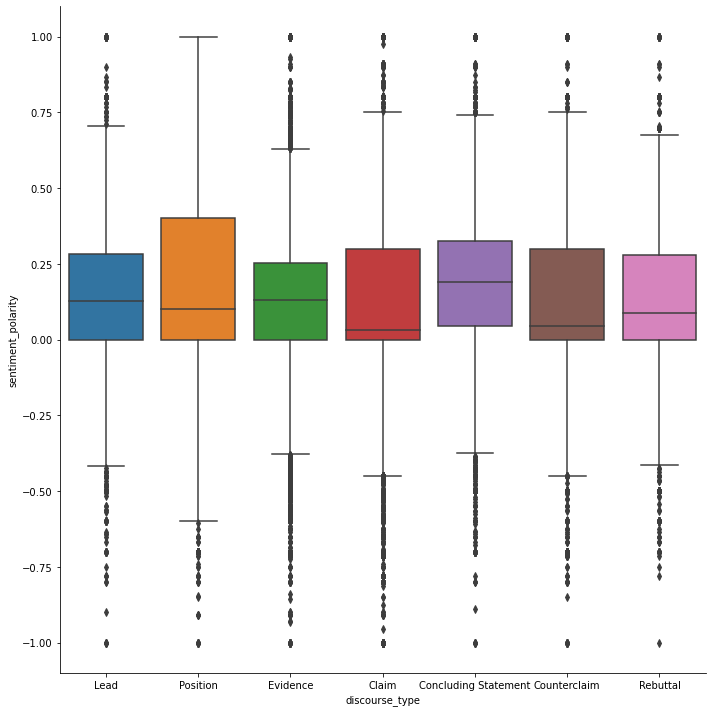

In [177]:
sns.catplot(x='discourse_type' , y = 'sentiment_polarity' , data =df_new , kind = 'box' , height=10 )

#### n-Gram Distribution [ Unigram , Bigram & Trigram ]

In [91]:
from sklearn.feature_extraction.text import CountVectorizer 

##Unigram Distribution

def top_n_words(x , n):
    vec = CountVectorizer(ngram_range=(1,1), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_of_words = bag_of_words.sum(axis =0)
    words_freq = [(word,sum_of_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True )
    return words_freq[:n]
  
words_unigram = top_n_words(df_new['Clean_discourse_text'] , 15)

In [92]:
words_unigram 

[('students', 52029),
 ('people', 43276),
 ('school', 32817),
 ('help', 21639),
 ('like', 20340),
 ('time', 19818),
 ('just', 19384),
 ('make', 19195),
 ('car', 18862),
 ('cars', 18262),
 ('think', 17292),
 ('student', 16782),
 ('work', 14427),
 ('electoral', 14427),
 ('good', 13536)]

In [119]:
## Bi-igram Distribution
def top_n_words(x , n):
    vec = CountVectorizer(ngram_range=(2,2) , stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_of_words = bag_of_words.sum(axis =0)
    words_freq = [(word,sum_of_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True )
    return words_freq[:n]

words_bigram = top_n_words(df_new['Clean_discourse_text'] , 15)

In [120]:
words_bigram

#df.groupby(['discourse_type'])['match'].value_counts()

[('electoral college', 11136),
 ('driverless cars', 5623),
 ('cell phones', 3819),
 ('community service', 3670),
 ('popular vote', 3207),
 ('online classes', 2838),
 ('distance learning', 2642),
 ('summer projects', 2427),
 ('classes home', 2374),
 ('united states', 2246),
 ('cell phone', 2194),
 ('multiple people', 2178),
 ('student designed', 1937),
 ('driverless car', 1885),
 ('extracurricular activities', 1797)]

In [94]:
## Tri-igram Distribution
def top_n_words(x , n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_of_words = bag_of_words.sum(axis =0)
    words_freq = [(word,sum_of_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True )
    return words_freq[:n]

words_trigram = top_n_words(df_new['Clean_discourse_text'] , 15)

In [95]:
words_trigram

[('facial action coding', 1173),
 ('attend classes home', 1069),
 ('limiting car usage', 871),
 ('use cell phones', 806),
 ('make better choice', 749),
 ('help make better', 743),
 ('electoral college unfair', 726),
 ('seeking multiple opinions', 651),
 ('election popular vote', 575),
 ('able attend classes', 564),
 ('student designed projects', 560),
 ('cell phones school', 549),
 ('ask multiple people', 539),
 ('online video conferencing', 532),
 ('seagoing cowboys program', 522)]

In [127]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91987\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [131]:
import nltk
from nltk.stem import WordNetLemmatizer

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

df_new['lemmatizer_text'] = df_new['Clean_discourse_text'].apply(lambda x: lemmatize_text(x))

In [132]:
df_new['lemmatizer_text'] = df_new['Clean_discourse_text'].apply(lambda x: lemmatize_text(x))

In [133]:
df_new.head(5)

discourse_id  discourse_start  discourse_end  \
id                                                           
423A1CA112E2  1.622630e+12                8            229   
423A1CA112E2  1.622630e+12              230            312   
423A1CA112E2  1.622630e+12              313            401   
423A1CA112E2  1.622630e+12              402            758   
423A1CA112E2  1.622630e+12              759            886   

                                                 discourse_text  \
id                                                                
423A1CA112E2  modern humans today are always on their phone....   
423A1CA112E2  they are some really bad consequences when stu...   
423A1CA112E2  some certain areas in the united states ban ph...   
423A1CA112E2  when people have phones, they know about certa...   
423A1CA112E2  driving is one of the way how to get around. p...   

             discourse_type discourse_type_num  \
id                                               
423A1CA112E2           Lead             Lead 1   
423A1CA112E2       Position         Position 1   
423A1CA112E2       Evidence         Evidence 1   
423A1CA112E2       Evidence         Evidence 2   
423A1CA112E2          Claim            Claim 1   

                                               predictionstring  \
id                                                                
423A1CA112E2  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...   
423A1CA112E2       45 46 47 48 49 50 51 52 53 54 55 56 57 58 59   
423A1CA112E2    60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75   
423A1CA112E2  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...   
423A1CA112E2  139 140 141 142 143 144 145 146 147 148 149 15...   

              predictionstring_len  discourse_text_len  match  \
id                                                              
423A1CA112E2                    44                  44   True   
423A1CA112E2                    15                  15   True   
423A1CA112E2                    16                  16   True   
423A1CA112E2                    63                  63   True   
423A1CA112E2                    24                  24   True   

                                           Clean_discourse_text  word_count  \
id                                                                            
423A1CA112E2  modern humans today are always on their phone ...          44   
423A1CA112E2  they are some really bad consequences when stu...          15   
423A1CA112E2  some certain areas in the united states ban ph...          16   
423A1CA112E2  when people have phones  they know about certa...          63   
423A1CA112E2  driving is one of the way how to get around  p...          24   

              avg_word_length  sentiment_polarity  sentiment_subjectivity  \
id                                                                          
423A1CA112E2         3.954545            0.183333                0.216667   
423A1CA112E2         4.466667           -0.700000                0.666667   
423A1CA112E2         4.437500            0.214286                0.571429   
423A1CA112E2         4.555556            0.029762                0.515476   
423A1CA112E2         4.208333           -0.333333                0.666667   

                                                lemmatizer_text  
id                                                               
423A1CA112E2  modern human today are always on their phone t...  
423A1CA112E2  they are some really bad consequence when stuf...  
423A1CA112E2  some certain area in the united state ban phon...  
423A1CA112E2  when people have phone they know about certain...  
423A1CA112E2  driving is one of the way how to get around pe...

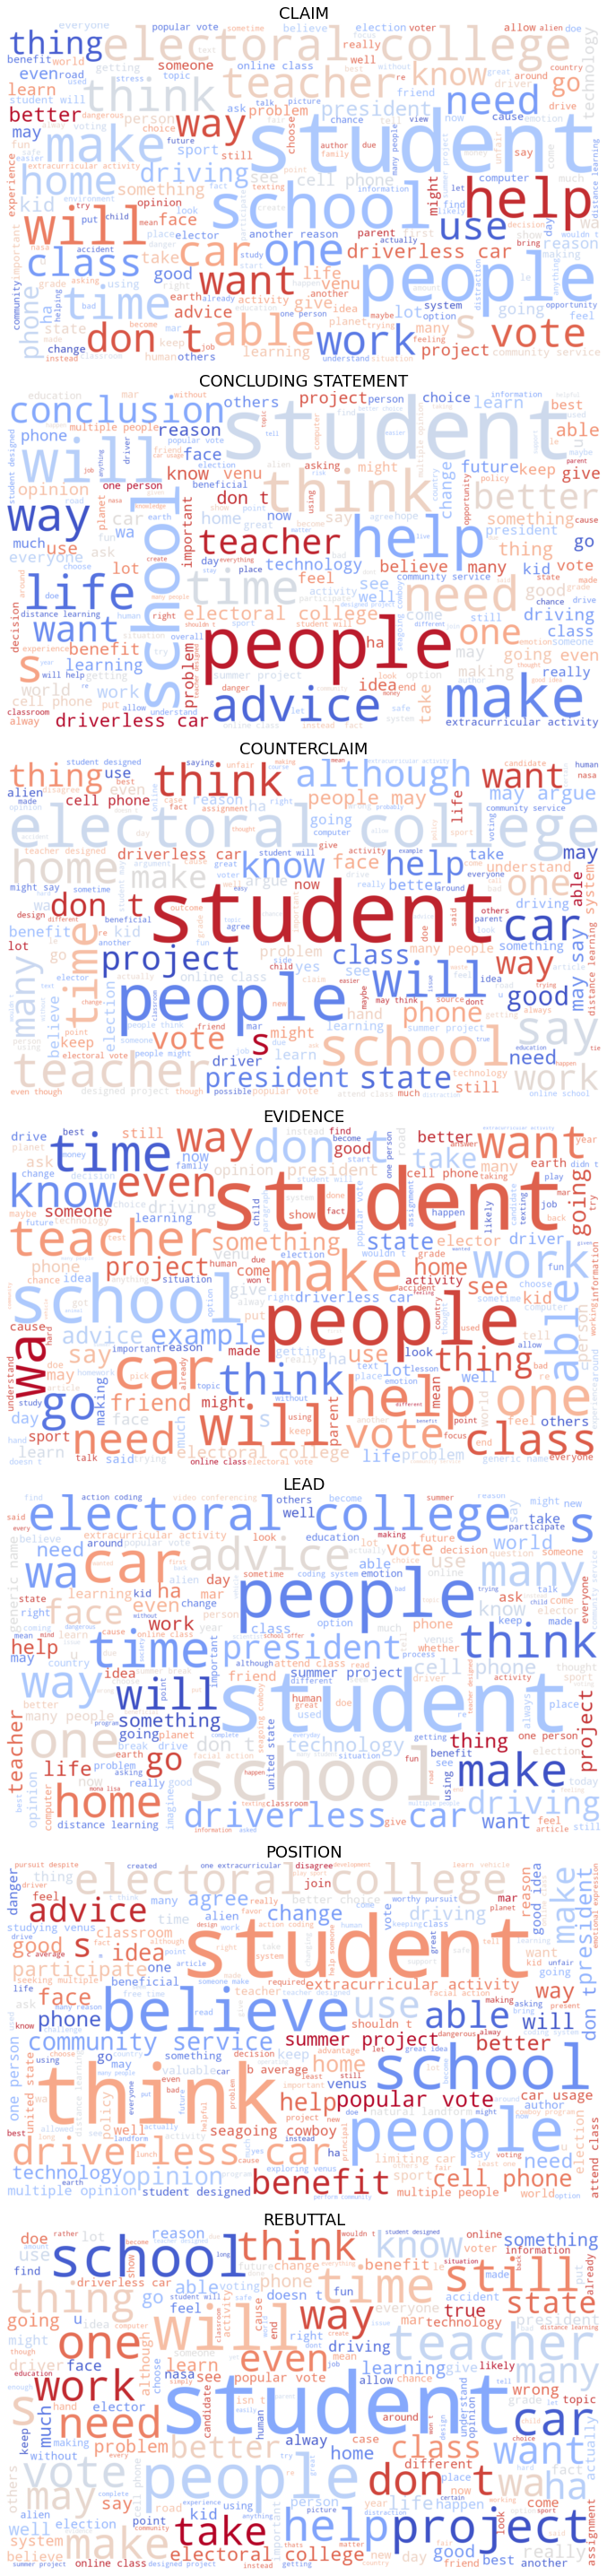

In [185]:
## WORDCLOUD GENERATION based on Discourse_TYPE
from wordcloud import WordCloud , STOPWORDS
# Create the figure and axes we will use (7 subplots for 7 classes)
fig, axs = plt.subplots(7, 1, figsize=(20, 40))
plt_idx = 0

for discourse_type, d in df.groupby("discourse_type"):
    # Concatenate all the discourse texts into a single string
    discourse_text = " ".join(d["lemmatizer_text"].values.tolist())
    stopwords = set(STOPWORDS)
    
    # Generate the word cloud
    wordcloud = WordCloud(
        max_font_size=200,
        max_words=200,
        width=1400,
        height=800,
        colormap="coolwarm",
        background_color="white",
        stopwords = stopwords
    ).generate(discourse_text)
    
    # Manage the axes
    axs = axs.flatten()
    axs[plt_idx].imshow(wordcloud, interpolation="bilinear")
    axs[plt_idx].set_title(discourse_type.upper(), fontsize=18)
    axs[plt_idx].axis("off")
    plt_idx += 1

# Plot
plt.tight_layout()
plt.show()

 #### n-Gram Distribution [ Unigram , Bigram & Trigram ] on Lemmatization Text

In [134]:
from sklearn.feature_extraction.text import CountVectorizer 

##Unigram Distribution

def top_n_words(x , n):
    vec = CountVectorizer(ngram_range=(1,1), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_of_words = bag_of_words.sum(axis =0)
    words_freq = [(word,sum_of_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True )
    return words_freq[:n]
  
words_unigram_lemm = top_n_words(df_new['lemmatizer_text'] , 15)

In [135]:
words_unigram_lemm

[('student', 68813),
 ('people', 44416),
 ('school', 37725),
 ('car', 37124),
 ('help', 24306),
 ('time', 23161),
 ('make', 22147),
 ('like', 20629),
 ('just', 19384),
 ('wa', 18660),
 ('class', 18145),
 ('vote', 18074),
 ('think', 17853),
 ('teacher', 16535),
 ('way', 16061)]

In [143]:
### Plotting Unigram 
#Converting the results into a Dataframe

df_Unigram = pd.DataFrame(words_unigram_lemm, columns = ['Unigram' , 'Frequency'])
#df_Unigram = df_Unigram.set_index('Unigram')
df_Unigram
sns.catplot(x='Frequency' , y = 'Unigram' , data =df_Unigram , kind = 'bar' , height=5 ) 

Unigram  Frequency
0   student      68813
1    people      44416
2    school      37725
3       car      37124
4      help      24306
5      time      23161
6      make      22147
7      like      20629
8      just      19384
9        wa      18660
10    class      18145
11     vote      18074
12    think      17853
13  teacher      16535
14      way      16061

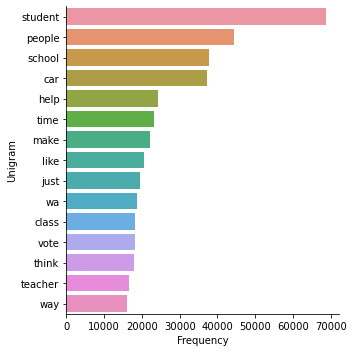

In [146]:
sns.catplot(x='Frequency' , y = 'Unigram' , data =df_Unigram , kind = 'bar' , height=5 ) 

In [136]:
from sklearn.feature_extraction.text import CountVectorizer 

##Bigram Distribution

def top_n_words(x , n):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_of_words = bag_of_words.sum(axis =0)
    words_freq = [(word,sum_of_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True )
    return words_freq[:n]
  
words_bigram_lemm = top_n_words(df_new['lemmatizer_text'] , 15)

In [137]:
words_bigram_lemm

[('electoral college', 11278),
 ('driverless car', 7508),
 ('cell phone', 6025),
 ('popular vote', 3964),
 ('community service', 3735),
 ('summer project', 3522),
 ('extracurricular activity', 3440),
 ('online class', 3318),
 ('class home', 2679),
 ('distance learning', 2648),
 ('multiple people', 2289),
 ('united state', 2283),
 ('help student', 2256),
 ('electoral vote', 2162),
 ('seagoing cowboy', 2047)]

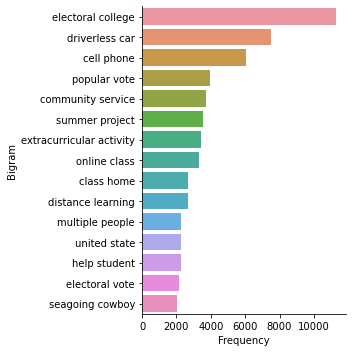

In [147]:
### Plotting Unigram 
#Converting the results into a Dataframe

df_Bigram = pd.DataFrame(words_bigram_lemm, columns = ['Bigram' , 'Frequency'])
#df_Unigram = df_Unigram.set_index('Unigram')
#df_Unigram

sns.catplot(x='Frequency' , y = 'Bigram' , data =df_Bigram , kind = 'bar' , height=5 ) 

In [138]:
from sklearn.feature_extraction.text import CountVectorizer 

##Bigram Distribution

def top_n_words(x , n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_of_words = bag_of_words.sum(axis =0)
    words_freq = [(word,sum_of_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True )
    return words_freq[:n]
  
words_trigram_lemm = top_n_words(df_new['lemmatizer_text'] , 15)

In [139]:
words_trigram_lemm

[('facial action coding', 1178),
 ('attend class home', 1175),
 ('use cell phone', 1000),
 ('make better choice', 986),
 ('student designed project', 893),
 ('limiting car usage', 890),
 ('help make better', 816),
 ('electoral college unfair', 730),
 ('summer project student', 712),
 ('participate extracurricular activity', 710),
 ('teacher designed project', 695),
 ('seeking multiple opinion', 666),
 ('election popular vote', 652),
 ('cell phone school', 635),
 ('able attend class', 616)]

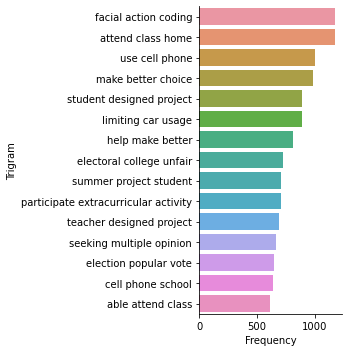

In [148]:
### Plotting Unigram 
#Converting the results into a Dataframe

df_Trigram = pd.DataFrame(words_trigram_lemm, columns = ['Trigram' , 'Frequency'])
#df_Unigram = df_Unigram.set_index('Unigram')
#df_Unigram

sns.catplot(x='Frequency' , y = 'Trigram' , data =df_Trigram , kind = 'bar' , height=5 ) 
      

In [188]:
from textblob import TextBlob
df_new['sentiment_polarity'] = df_new['lemmatizer_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [189]:
df_new['sentiment_subjectivity'] = df_new['lemmatizer_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

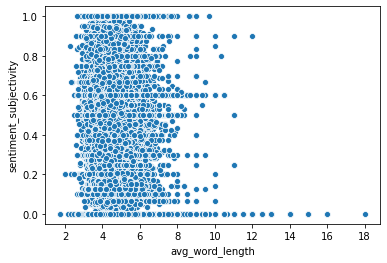

In [190]:
sns.scatterplot(x='avg_word_length' , y = 'sentiment_subjectivity' , data =df_new )

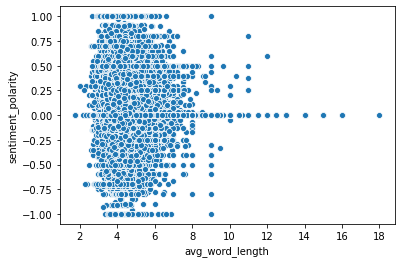

In [191]:
sns.scatterplot(x='avg_word_length' , y = 'sentiment_polarity' , data =df_new )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C03FAB9B50>,
      dtype=object)

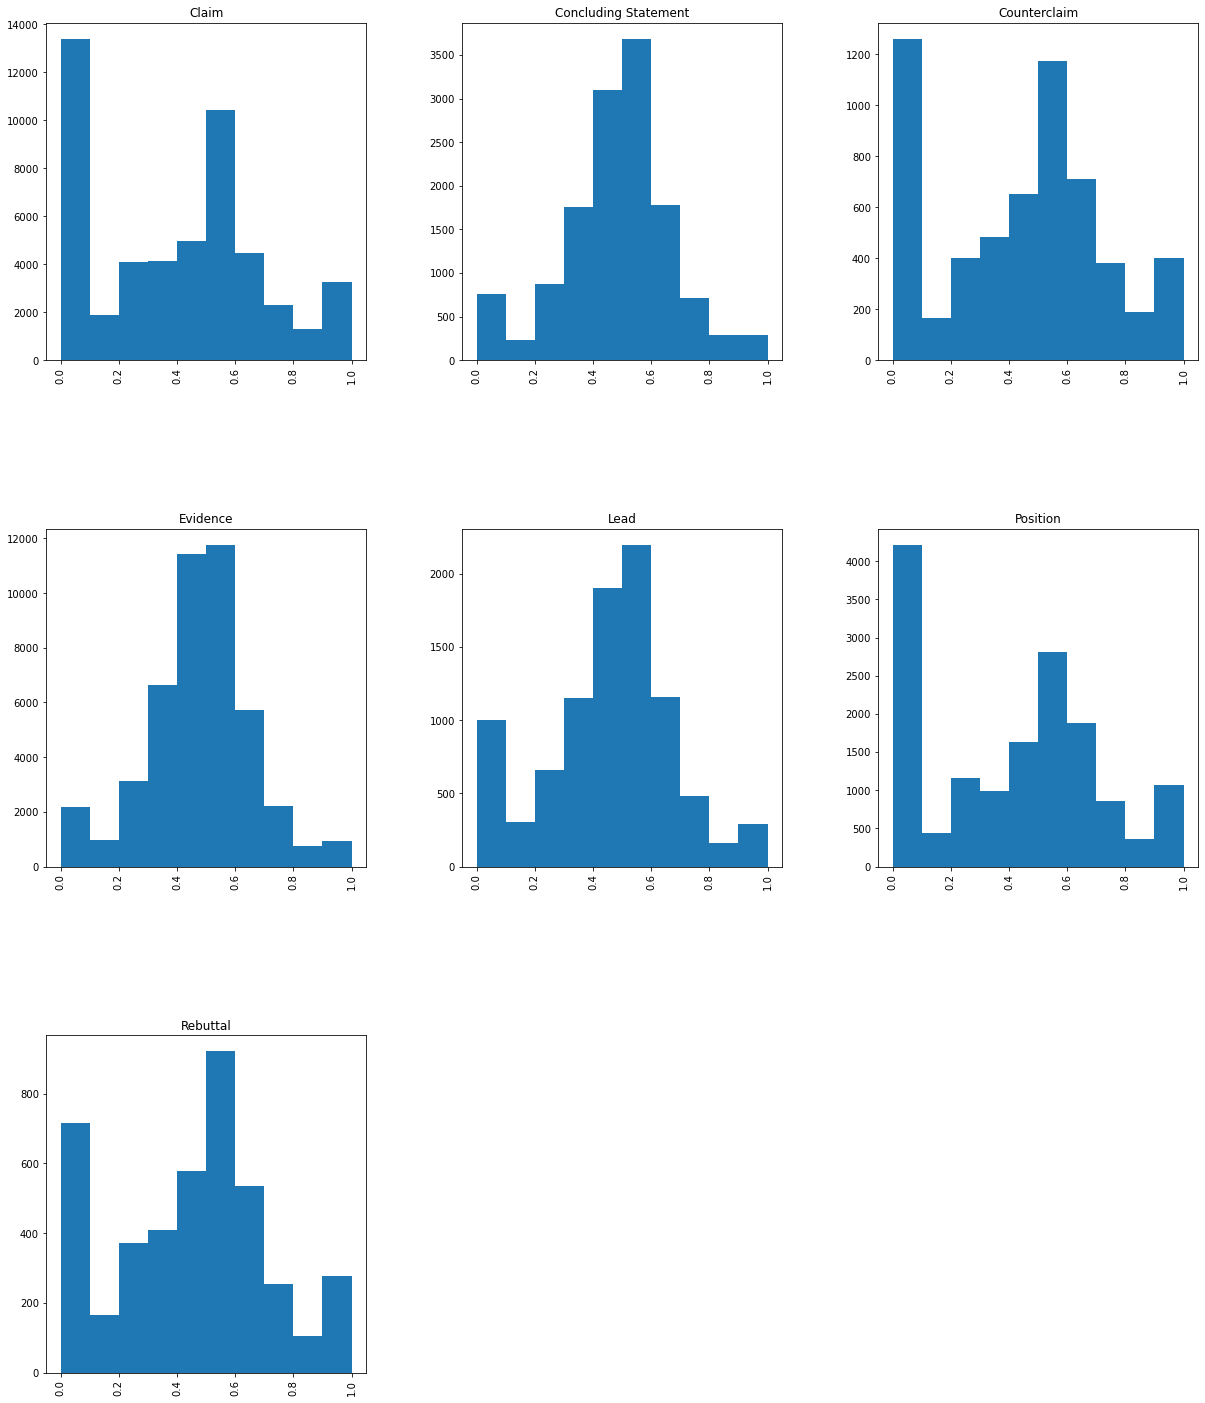

In [192]:
  df_new['sentiment_subjectivity'].hist(by=df_new['discourse_type'], figsize=(20, 25),bins = 10, )